<a href="https://colab.research.google.com/github/dzuriahilma/bangkit/blob/main/Dzuria_Hilma_Qurotu_Ain_Proyek_Analisis_Data_ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dzuria Hilma Qurotu Ain
- **Email:** m180d4kx1409@bangkit.academy
- **ID Dicoding:** m180d4kx1409

## Menentukan Pertanyaan Bisnis


- Bagaimana sebaran negara customer di seluruh dunia?
- Apa jenis pembayaran yang paling banyak digunakan oleh customer?
- Jenis kategori produk apa yang sering dibeli oleh customer?
- Berapa persentase customer yang memberikan review score 5?
- Bagaimana korelasi / hubungan antara harga dan ongkos kirim?

## Import Semua Packages/Library yang Digunakan

In [82]:
!pip install streamlit

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import numpy as np

In [84]:
sns.set(style='whitegrid')

## Data Wrangling

### Gathering Data

####menginput data customer

In [85]:
customer_data = pd.read_csv("/content/customers_dataset.csv")
customer_data.head()
#Mengeluarkan data frame data customer dengan tampilan hanya 5 baris pertama

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


####menginput data order_items


In [86]:
item_order_data = pd.read_csv("/content/order_items_dataset.csv")
item_order_data.head()
#Mengeluarkan data frame data order_item dengan tampilan hanya 5 baris pertama

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


####menginput data order_payments

In [87]:
payment_data = pd.read_csv("/content/order_payments_dataset.csv")
payment_data.head()
#Mengeluarkan data frame data pembayaran dengan tampilan hanya 5 baris pertama

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


####menginput data order_review

In [88]:
review_data = pd.read_csv("/content/order_reviews_dataset.csv")
review_data.head()
#Mengeluarkan data frame data review dengan tampilan hanya 5 baris pertama

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


####menginput data orders

In [89]:
order_data = pd.read_csv("/content/orders_dataset.csv")
order_data.head()
#Mengeluarkan data frame data order dengan tampilan hanya 5 baris pertama

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


####menginput data products

In [90]:
produk_data = pd.read_csv("/content/products_dataset.csv")
produk_data.head()
#Mengeluarkan data frame data produk dengan tampilan hanya 5 baris pertama

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


####menginput data namaproduk



In [91]:
namaproduk_data = pd.read_csv("/content/product_category_name_translation.csv")
namaproduk_data.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

####Assessing dataframe costumer_data

In [92]:
#Periksa tipe data setiap kolom
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [93]:
#Menampilkan statistika deskriptif
customer_data.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [94]:
#Periksa data duplikat
print("Banyak data duplikat: ", customer_data.duplicated().sum())

Banyak data duplikat:  0


####Assessing dataframe item_order_data

In [95]:
#Periksa tipe data setiap kolom
item_order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [96]:
#Menampilkan statistika deskriptif
item_order_data.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [97]:
#Periksa data duplikat
print("Banyak data duplikat: ", item_order_data.duplicated().sum())

Banyak data duplikat:  0


####Assessing dataframe payment_data

In [98]:
#Periksa tipe data per kolom
payment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [99]:
#Menampilkan statistika deskriptif
payment_data.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [100]:
#Periksa data duplikat
print("Banyak data duplikat: ",payment_data.duplicated().sum())

Banyak data duplikat:  0


####Assessing dataframe review_data

In [101]:
#Periksa tipe data per kolom
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [102]:
#Cek jumlah missing value pada tiap kolom
review_data.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

> Terdapat 87656 missing values pada `review_comment_title` dan 58247 missing valuae pada `review_comment_message` sehingga perlu ditinjau ulang sebelum dianalisis.

In [103]:
#Periksa data duplikat
print("Banyak data duplikat: ",review_data.duplicated().sum())

Banyak data duplikat:  0


####Assessing dataframe order_data

In [104]:
#Periksa tipe data per kolom
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [105]:
#Cek jumlah missing value pada tiap kolom
order_data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Terdapat 160 missing value pada order_approved_at, 1783 pada order_delivered_carrier_date, 2965 pada order_delivered_costumer_date dan 1 pada order_estimated_delivery_date

In [106]:
#Periksa data duplikat
print("Banyak data duplikat: ",order_data.duplicated().sum())

Banyak data duplikat:  0


####Assessing dataframe products

In [107]:
#Periksa tipe data per kolom
produk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [108]:
#Cek jumlah missing value pada tiap kolom
produk_data.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Terdapat beberapa missing value di beberapa variabel

In [109]:
#Periksa data duplikat
print("Banyak data duplikat: ",produk_data.duplicated().sum())

Banyak data duplikat:  0


####Assessing dataframe namaproduk

In [110]:
#Periksa tipe data per kolom
namaproduk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [111]:
#Menampilkan statistika deskriptif
namaproduk_data.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [112]:
#Periksa data duplikat
print("Banyak data duplikat: ",namaproduk_data.duplicated().sum())

Banyak data duplikat:  0


### Cleaning Data

####Dataframe customer

In [113]:
#Menghapus data yang tidak digunakan
customer_data.drop(['customer_unique_id','customer_city','customer_zip_code_prefix'], axis=1, inplace=True)
customer_data.head()

,customer_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,SP
1,18955e83d337fd6b2def6b18a428ac77,SP
2,4e7b3e00288586ebd08712fdd0374a03,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,SP


####Dataframe item_order

In [114]:
#Menghapus data yang tidak digunakan
item_order_data.drop(['order_item_id','seller_id','shipping_limit_date'], axis=1, inplace=True)
item_order_data.head()

,order_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14


####Dataframe payments

In [115]:
#Menghapus data yang tidak digunakan
payment_data.drop(['payment_sequential','payment_installments'], axis=1, inplace=True)
payment_data.head()

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,128.45


####Dataframe review

In [116]:
#Menghapus data yang tidak digunakan
review_data.drop(['review_id','review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'], axis=1, inplace=True)
review_data.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


####Dataframe orders

In [117]:
#Menghapus data yang tidak digunakan
order_data.drop(order_data.columns.difference(['order_id','customer_id',"order_status"]), axis=1, inplace=True)
order_data.head()

,order_id,customer_id,order_status
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered


####Dataframe products

In [118]:
#Menghapus data yang tidak digunakan
produk_data.drop(produk_data.columns.difference(['product_id','product_category_name']), axis=1, inplace=True)
produk_data.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


##Exploratory Data Analysis

###Exploratory orders dan customer

In [119]:
#menggabungkan orders dan customer
customer_order_data = pd.merge(
   left=order_data,
   right=customer_data,
   how="left",
   left_on="customer_id",
   right_on="customer_id"
)
customer_order_data.head()

,order_id,customer_id,order_status,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,SP


###Exploratory products & prodnames

In [120]:
#menggabungkan orders dan customer
order_customer_data = pd.merge(
   left=produk_data,
   right=namaproduk_data,
   how="left",
   left_on="product_category_name",
   right_on="product_category_name"
)
order_customer_data.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


###Exploratory order_items & order_payments

In [121]:
#menggabungkan item dan payments
order_payment_data = pd.merge(
   left=item_order_data,
   right=payment_data,
   how="left",
   left_on="order_id",
   right_on="order_id"
)
order_payment_data.head()

,order_id,product_id,price,freight_value,payment_type,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,credit_card,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,credit_card,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,credit_card,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,credit_card,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,credit_card,218.04


###Exploratory product_payments & order_review

In [122]:
#menggabungkan product_payments dan product_review
selling_data = pd.merge(
   left=order_payment_data,
   right=review_data,
   how="left",
   left_on="order_id",
   right_on="order_id"
)
selling_data.head()

,order_id,product_id,price,freight_value,payment_type,payment_value,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29,credit_card,72.19,5.0
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93,credit_card,259.83,4.0
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87,credit_card,216.87,5.0
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79,credit_card,25.78,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14,credit_card,218.04,5.0


In [123]:
#mengisi missing value
#review_score berupa numerik, jadi diisi dengan mean
selling_data.review_score.mean()
selling_data['review_score'].fillna(value=4.073, inplace=True) #isi dengan mean
selling_data.isna().sum() #re-check

order_id         0
product_id       0
price            0
freight_value    0
payment_type     3
payment_value    3
review_score     0
dtype: int64

###Exploratory customer_orders & selling



In [124]:
#menggabungkan orders_customer dan selling
all_data = pd.merge(
   left=customer_order_data,
   right=selling_data,
   how="left",
   left_on="order_id",
   right_on="order_id"
)
all_data.head()

,order_id,customer_id,order_status,customer_state,product_id,price,freight_value,payment_type,payment_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,SP,87285b34884572647811a353c7ac498a,29.99,8.72,credit_card,18.12,4.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,2.00,4.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,18.59,4.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,boleto,141.46,4.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,GO,aa4383b373c6aca5d8797843e5594415,159.90,19.22,credit_card,179.12,5.0


In [125]:
#menggabungkan products_name dan selling
all_data = pd.merge(
   left=all_data,
   right=order_customer_data,
   how="left",
   left_on="product_id",
   right_on="product_id"
)
all_data.head()

,order_id,customer_id,order_status,customer_state,product_id,price,freight_value,payment_type,payment_value,review_score,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,SP,87285b34884572647811a353c7ac498a,29.99,8.72,credit_card,18.12,4.0,utilidades_domesticas,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,2.00,4.0,utilidades_domesticas,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,SP,87285b34884572647811a353c7ac498a,29.99,8.72,voucher,18.59,4.0,utilidades_domesticas,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,BA,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,boleto,141.46,4.0,perfumaria,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,GO,aa4383b373c6aca5d8797843e5594415,159.90,19.22,credit_card,179.12,5.0,automotivo,auto


In [126]:
print("Banyak data duplikat: ", all_data.duplicated().sum())

Banyak data duplikat:  11675


In [127]:
all_data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
customer_state                      0
product_id                        775
price                             775
freight_value                     775
payment_type                      778
payment_value                     778
review_score                      775
product_category_name            2484
product_category_name_english    2509
dtype: int64

In [128]:
all_data.drop_duplicates(inplace=True)
print("Banyak data duplikat: ", all_data.duplicated().sum())

Banyak data duplikat:  0


In [129]:
all_data.to_csv("all_data_marge.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana sebaran negara customer di seluruh dunia?

In [130]:
#Menghitung jumlah sebaran customer di setiap negara di dunia
count_payment_type_data = all_data.groupby("customer_state").order_id.count().sort_values(ascending=False).reset_index()
count_payment_type_data.head(15)

,customer_state,order_id
0,SP,45163
1,RJ,14006
2,MG,12527
3,RS,5887
4,PR,5394
5,SC,3878
6,BA,3701
7,DF,2295
8,GO,2193
9,ES,2186


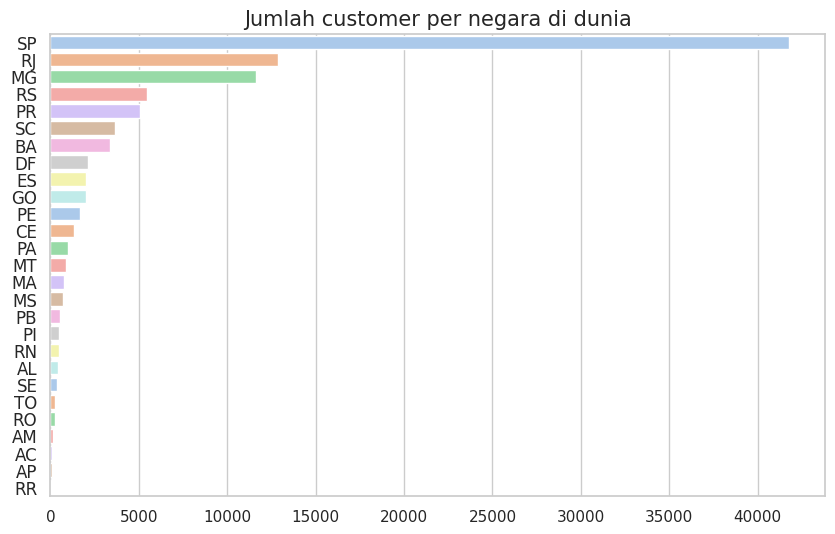

In [131]:
#Diagram batang untuk melihat jumlah sebaran customer di setiap negara di dunia
bycategory_data = all_data.groupby(by=["customer_state"]).order_id.nunique().reset_index()
bycategory_data.rename(columns={
    "order_id": "cust_count"
}, inplace=True)

plt.figure(figsize=(10, 6))

sns.barplot(
    y="customer_state",
    x="cust_count",
    hue="customer_state",
    data=bycategory_data.sort_values(by="cust_count", ascending=False),
    palette="pastel", legend=False
)
plt.title("Jumlah customer per negara di dunia", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan bar chart yang ditampilkan, dari 27 negara sebaran customer, customer yang paling banyak berasal dari negara SP, sedangan customer paling sedikit dari negara RR

### Pertanyaan 2: Apa jenis pembayaran yang paling banyak digunakan oleh customer?

In [132]:
#Menghitung jumlah pengguna per jenis pembayaran yang digunakan
count_payment_type_data = all_data.groupby("payment_type").order_id.count().sort_values(ascending=False).reset_index()
count_payment_type_data.head(15)

,payment_type,order_id
0,credit_card,79422
1,boleto,20343
2,voucher,5284
3,debit_card,1585


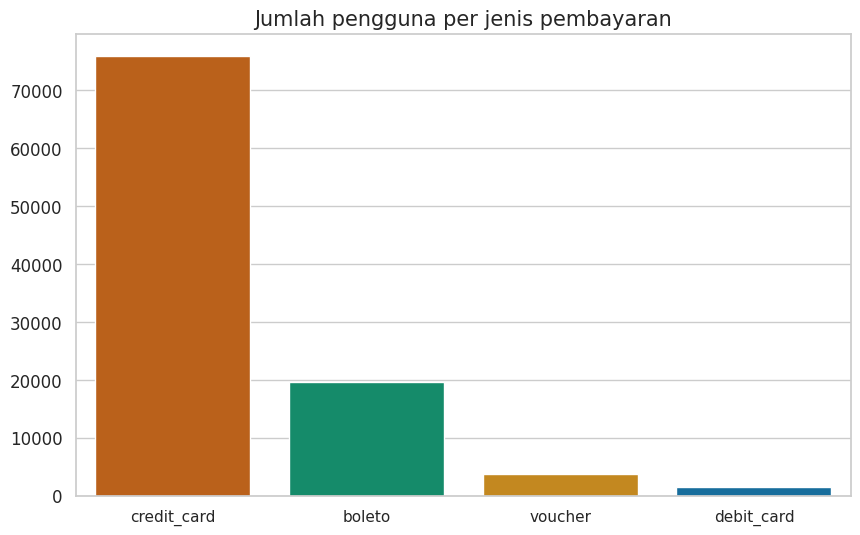

In [133]:
#Diagram batang untuk melihat jumlah pengguna per jenis pembayaran yang digunakan
bycategory_data = all_data.groupby(by=["payment_type"]).order_id.nunique().reset_index()
bycategory_data.rename(columns={
    "order_id": "cust_count"
}, inplace=True)

plt.figure(figsize=(10, 6))

sns.barplot(
    y="cust_count",
    x="payment_type",
    hue="cust_count",
    data=bycategory_data.sort_values(by="cust_count", ascending=False),
    palette="colorblind", legend=False
)
plt.title("Jumlah pengguna per jenis pembayaran", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Berdasarkan tampilan bar chart tersebut, dapat dilihat bahwa jenis pembayaran yang paling sering digunakan adalah jenis pembayaran credit card

###Pertanyaan 3: Jenis kategori produk apa yang sering dibeli customer?

In [134]:
#Menghitung jumlah pengguna per jenis kategori produk
count_product_category_data = all_data.groupby("product_category_name").order_id.count().sort_values(ascending=False).reset_index()
count_product_category_data.head(10)

,product_category_name,order_id
0,cama_mesa_banho,10797
1,beleza_saude,9267
2,esporte_lazer,8108
3,informatica_acessorios,7132
4,moveis_decoracao,7131
5,utilidades_domesticas,6341
6,relogios_presentes,5988
7,telefonia,4430
8,automotivo,4117
9,brinquedos,4109


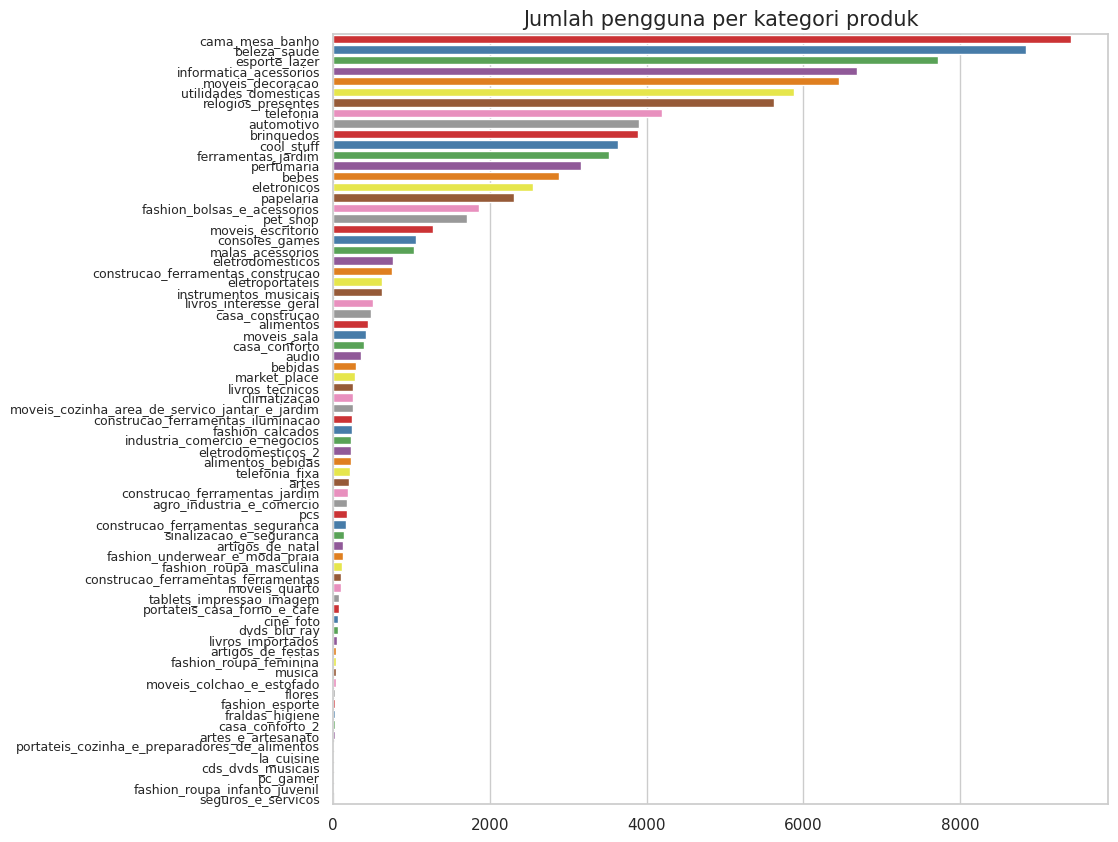

In [135]:
#Diagram batang untuk melihat jumlah customer per kategori produk
bycategory_data = all_data.groupby(by=["product_category_name"]).order_id.nunique().reset_index()
bycategory_data.rename(columns={
    "order_id": "cust_count"
}, inplace=True)

plt.figure(figsize=(10, 10))

sns.barplot(
    y="product_category_name",
    x="cust_count",
    hue="product_category_name",
    data=bycategory_data.sort_values(by="cust_count", ascending=False),
    palette="Set1", legend=False
)
plt.title("Jumlah pengguna per kategori produk", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=9)
plt.show()

>Berdasarkan bar chart tersebut, dapat dilihat bahwa kategori produk yang paling sering dibeli customer adalah cama mesa banho sebesar 10797



###Pertanyaan 4: Berapa persentase customer yang memberikan review rating 5?

In [136]:
#Menghitung jumlah review score customer
count_payment_type_data = all_data.groupby("review_score").order_id.count().sort_values(ascending=False).reset_index()
count_payment_type_data.head(15)

,review_score,order_id
0,5.000,60734
1,4.000,20326
2,1.000,12371
3,3.000,8839
4,2.000,3537
5,4.073,828


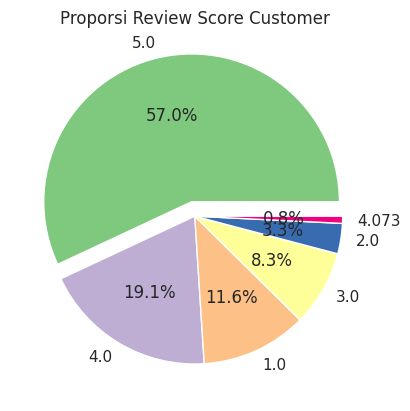

In [137]:
#membuat diagram lingkaran proporsi review score customer
review_count = all_data['review_score'].value_counts()
colors = sns.color_palette("Accent", len(review_count))
explode = (0.1, 0, 0, 0, 0, 0)

plt.pie(
    x=review_count,
    labels=review_count.index,
    autopct='%1.1f%%',
    colors=colors,
    explode=explode
)
plt.title('Proporsi Review Score Customer')

plt.show()

Berdasarkan pie chart tersebut, persentase customer yang memberikan review score 5 adalah sebanyak 57% dimana persentase tersebut paling banyak dibandingkan review score yang lain

### Pertanyaan 5 : Bagaimana hubungan / korelasi antara harga dan ongkos kirim?

In [138]:
#hitung korelasi antara harga dan ongkos kirim

sample_data = {
    'a': all_data['price'],
    'b': all_data['freight_value']
}

data = pd.DataFrame(sample_data)

data.corr(numeric_only=True)

,a,b
a,1.000000,0.421539
b,0.421539,1.000000


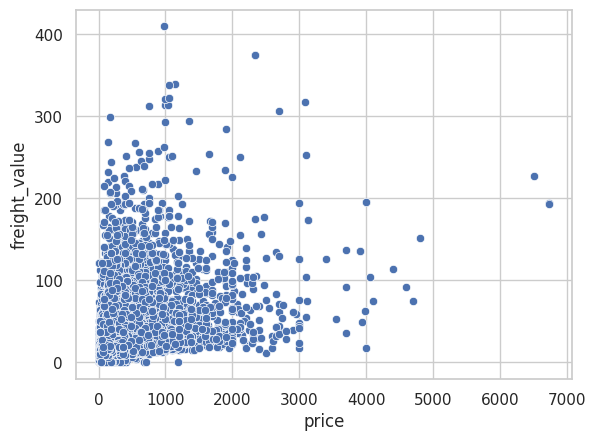

In [139]:
#membuat scatter plot antara harga dan ongkos kirim

sns.scatterplot(x=all_data['price'], y=all_data['freight_value'])
plt.show()

Berdasarkan output tersebut, dapat dilihat bahwa harga dan ongkos kirim berkorelasi positif yakni sebesar 0,421. Berdasarkan scaterplot juga dapat dilihat bahwa sebaran data membentuk pola berhubungan positif

## Conclusion

- sebaran negara customer dari 27 negara, paling banyak berasal dari negara SP dan paling sedikit berasal dari negara RR
- Tipe pembayaran paling sering digunakan adalah credit_card
- Jenis kategori produk yang paling sering dibeli customer adalah kategori cama_mesa_banho
- Sebanyak 57% customer memberikan review score 5
- Terdapat korelasi positif antara harga dan ongkos kirim